<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_DZ_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [4]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [18]:
df.shape

(891, 7)

In [5]:
# Аналіз числових ознак


numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


In [6]:
numeric_summary = df.describe()
numeric_summary

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

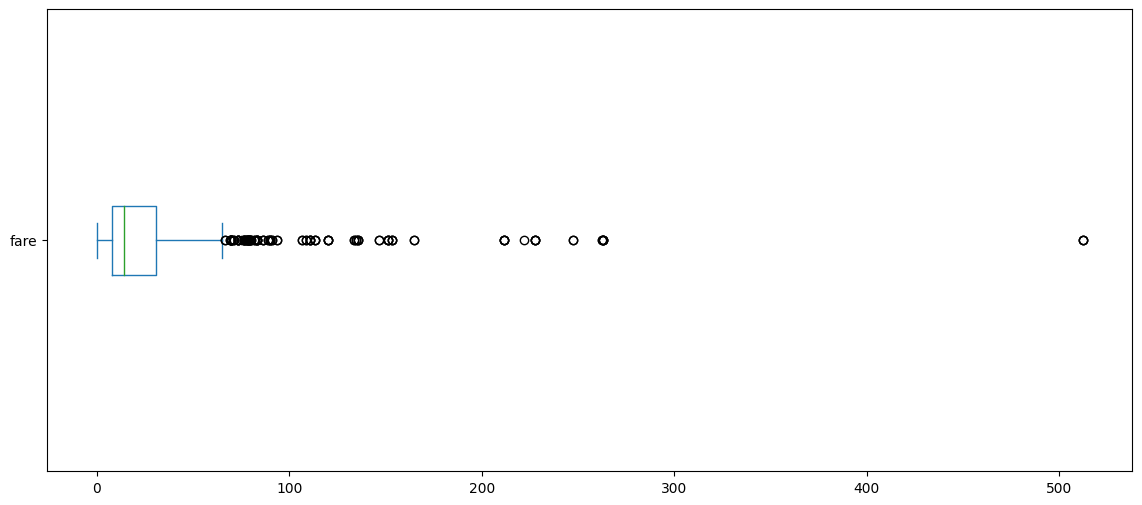

In [7]:
df['fare'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

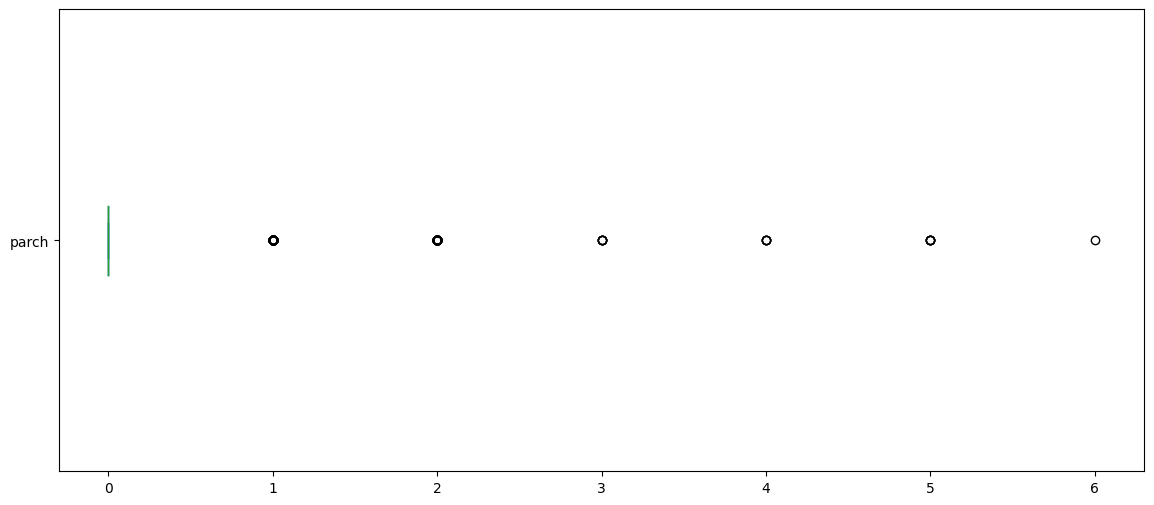

In [8]:
df['parch'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

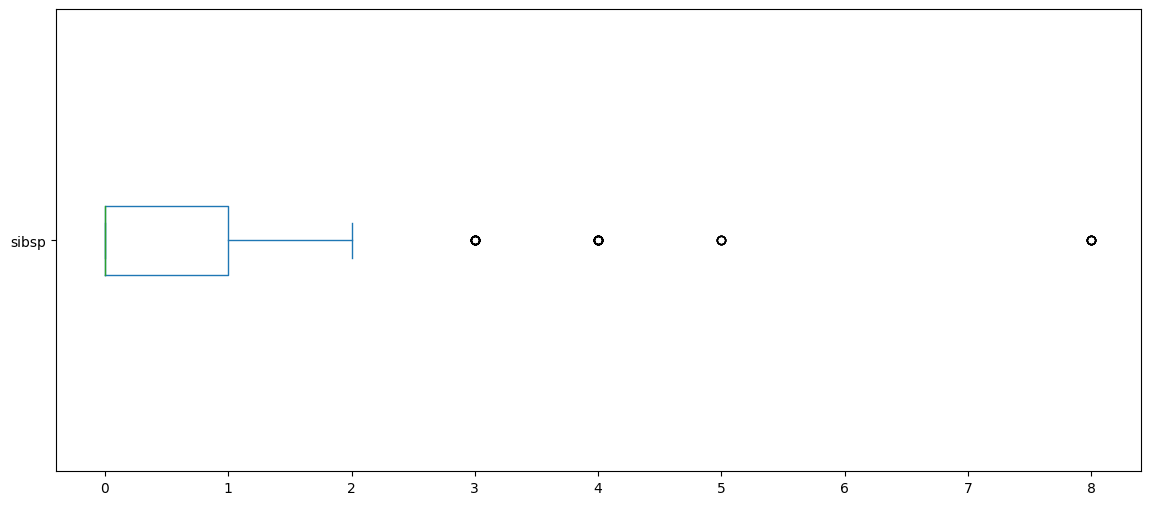

In [9]:
df['sibsp'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

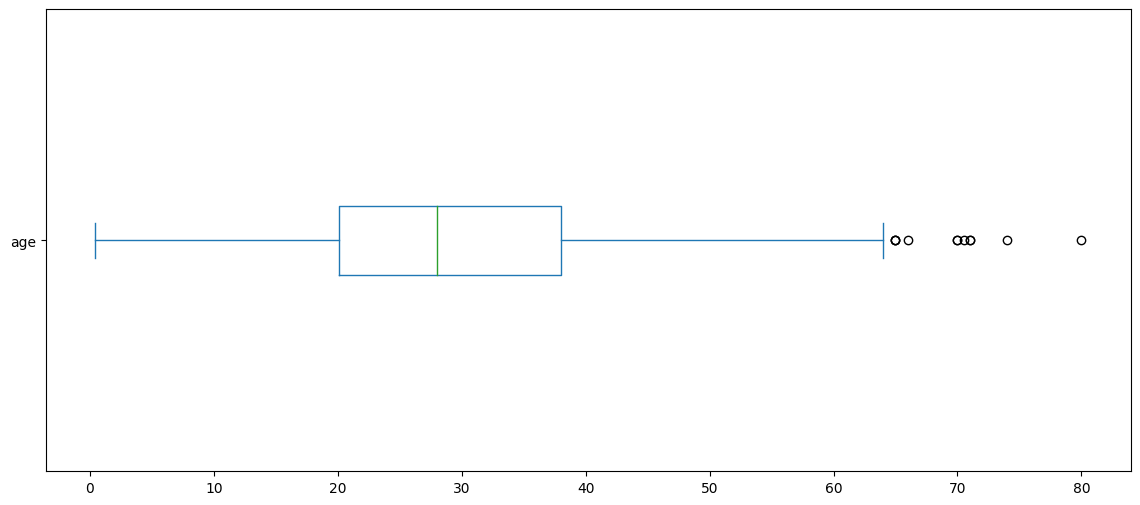

In [10]:
df['age'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

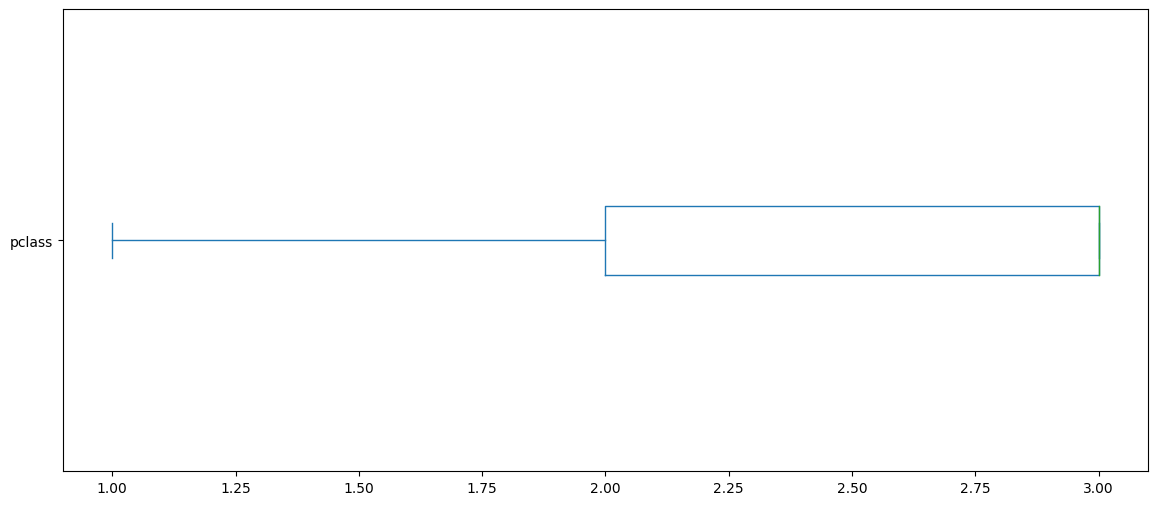

In [11]:
df['pclass'].plot(kind='box', vert=False, figsize=(14,6))

In [16]:
numeric_cols = df.select_dtypes(include=['number'])

# Обчислення квартилів і IQR для числових стовпців
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Межі для викидів
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Виявлення викидів у числових стовпцях
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

# Виведення кількості викидів у кожній колонці
print(outliers.sum())

# Виведення рядків з викидами
df_outliers = df[outliers.any(axis=1)]
df_outliers

pclass      0
age        11
sibsp      46
parch     213
fare      116
dtype: int64


,pclass,sex,age,sibsp,parch,fare,embarked
1,1,female,38.0,1,0,71.2833,C
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
10,3,female,4.0,1,1,16.7000,S
13,3,male,39.0,1,5,31.2750,S
...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S
879,1,female,56.0,0,1,83.1583,C
880,2,female,25.0,0,1,26.0000,S
885,3,female,39.0,0,5,29.1250,Q


In [17]:
df_cleaned = df[~outliers.any(axis=1)]

# Виведення розміру нового DataFrame
print(df_cleaned.shape)

(598, 7)


<Axes: >

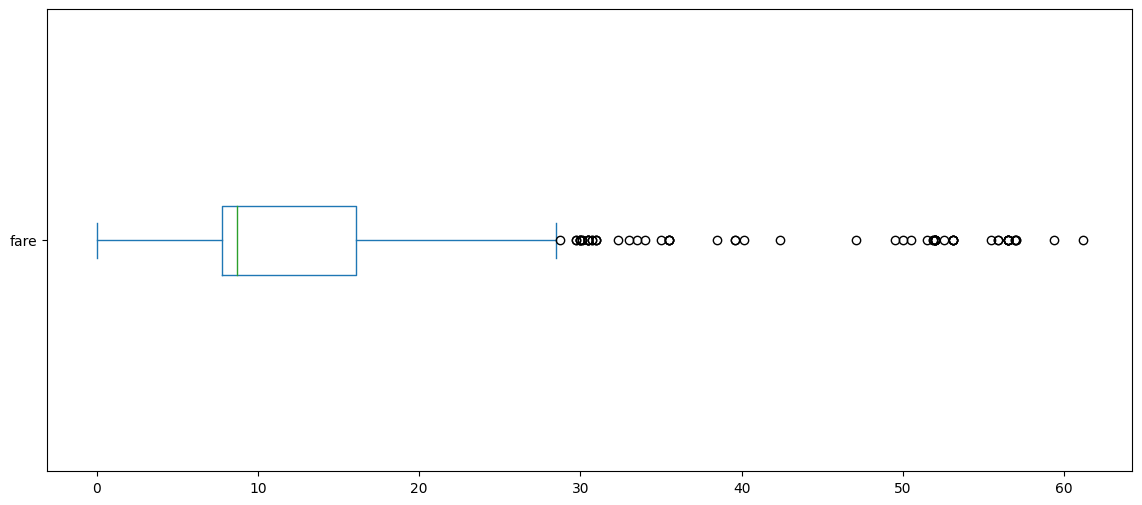

In [21]:
# ящик без викидів
df_cleaned['fare'].plot(kind='box', vert=False, figsize=(14,6))

In [29]:
# аналіз категоріальних ознак
df['pclass'] = df['pclass'].astype('category')

df.describe(include="object")
df.describe(include="category")

,pclass
count,891
unique,3
top,3
freq,491


In [30]:
df.describe(include="object")

,sex,embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [32]:
df['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [33]:
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [34]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


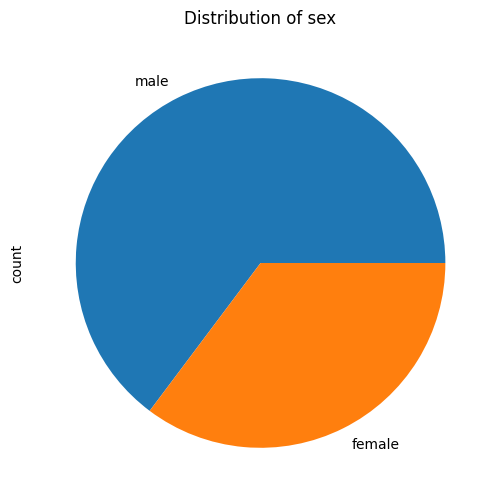

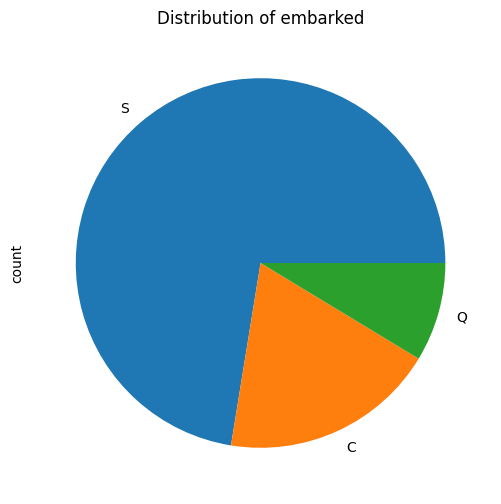

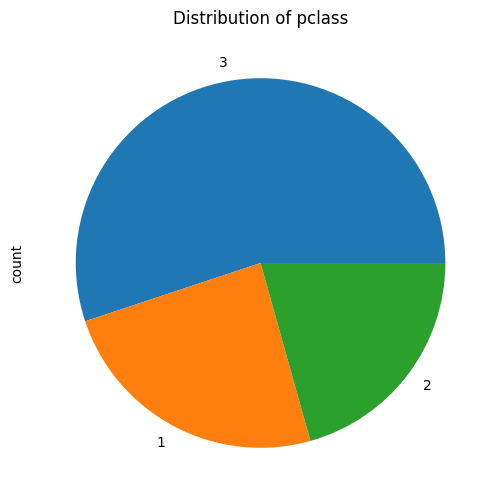

In [44]:
array = ['sex', 'embarked', 'pclass']


for i in array:
    df[i].value_counts().plot(kind='pie', figsize=(6, 6), title=f'Distribution of {i}')
    plt.show()

Аналіз числових ознак:

Вік: Середній вік пасажирів становить 28 років.
Тариф: Середній тариф становить 23.54. Існують помітні викиди, оскільки максимальний тариф становить 71.28. Викиди можуть свідчити про наявність VIP-пасажирів або екстремальні випадки, які можуть потребувати додаткового вивчення.
Аналіз категоріальних ознак:

Стать: Більшість пасажирів - чоловіки (60%).
Порт відправлення: Більшість пасажирів відправлялися з порту S. Можливо, це свідчить про більшу доступність або популярність цього порту.
Клас: Перевага третіх класів свідчить про те, що на борту було більше осіб з нижчим соціально-економічним статусом.